<a href="https://colab.research.google.com/github/Sarthak20Shukla/Machine-Learning/blob/master/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import load_digits
digits= load_digits()

dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

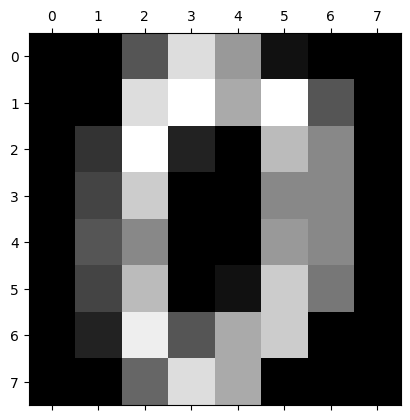

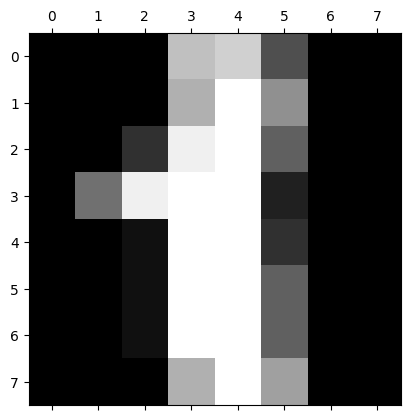

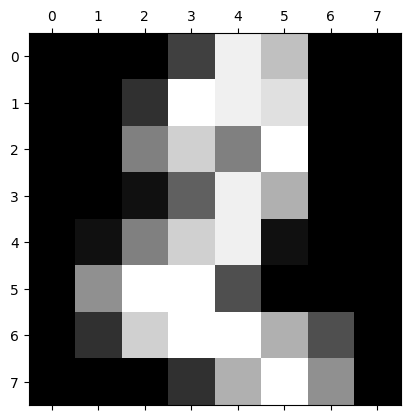

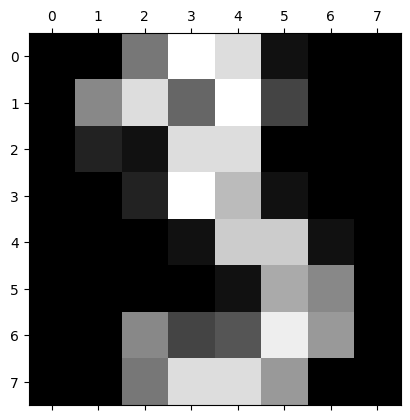

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()
for i in range(4):
  plt.matshow(digits.images[i])

In [6]:
df=pd.DataFrame(digits.data)
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [9]:
df['target']=digits.target
df.head

<bound method NDFrame.head of         0    1     2     3     4     5    6    7    8    9  ...   55   56  \
0     0.0  0.0   5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1     0.0  0.0   0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2     0.0  0.0   0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3     0.0  0.0   7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0   
4     0.0  0.0   0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...   ...  ...   ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...   
1792  0.0  0.0   4.0  10.0  13.0   6.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
1793  0.0  0.0   6.0  16.0  13.0  11.0  1.0  0.0  0.0  0.0  ...  0.0  0.0   
1794  0.0  0.0   1.0  11.0  15.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1795  0.0  0.0   2.0  10.0   7.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1796  0.0  0.0  10.0  14.0   8.0   1.0  0.0  0.0  0.0  2.0  ...  0.0  0.0   

       57   58    59    60    61   62   63  target  
0     0.0  6.0  13.0  10.0   0.0  0.0  0.0       0  
1     0.0  0.0  11.0  16.0  10.0  0.0  0.0       1  
2     0.0  0.0   3.0  11.0  16.0  9.0  0.0       2  
3     0.0  7.0  13.0  13.0   9.0  0.0  0.0       3  
4     0.0  0.0   2.0  16.0   4.0  0.0  0.0       4  
...   ...  ...   ...   ...   ...  ...  ...     ...  
1792  0.0  2.0  14.0  15.0   9.0  0.0  0.0       9  
1793  0.0  6.0  16.0  14.0   6.0  0.0  0.0       0  
1794  0.0  2.0   9.0  13.0   6.0  0.0  0.0       8  
1795  0.0  5.0  12.0  16.0  12.0  0.0  0.0       9  
1796  1.0  8.0  12.0  14.0  12.0  1.0  0.0       8  

[1797 rows x 65 columns]>

In [27]:
X = df.drop('target',axis='columns')
y = df.target



In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
from sklearn.ensemble import RandomForestClassifier

In [30]:
model=RandomForestClassifier(n_estimators=30)

In [31]:
model.fit(x_train,y_train)


RandomForestClassifier(n_estimators=30)

In [32]:

model.score(x_test,y_test)

0.9666666666666667

In [34]:
y_predicted = model.predict(X_test)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[0, 3, 4, 1, 0, 4, 2, 3, 1, 9],
       [2, 4, 3, 6, 5, 3, 3, 5, 0, 3],
       [5, 4, 4, 4, 5, 7, 3, 4, 4, 4],
       [4, 5, 3, 4, 3, 3, 5, 3, 7, 1],
       [6, 4, 3, 0, 4, 3, 5, 0, 3, 2],
       [7, 3, 6, 2, 4, 6, 2, 2, 1, 6],
       [2, 2, 3, 4, 4, 4, 4, 3, 1, 5],
       [5, 4, 8, 3, 4, 3, 4, 1, 5, 2],
       [5, 4, 1, 6, 7, 5, 6, 4, 7, 2],
       [3, 4, 4, 5, 3, 1, 2, 3, 2, 3]])

Text(95.72222222222221, 0.5, 'Truth')

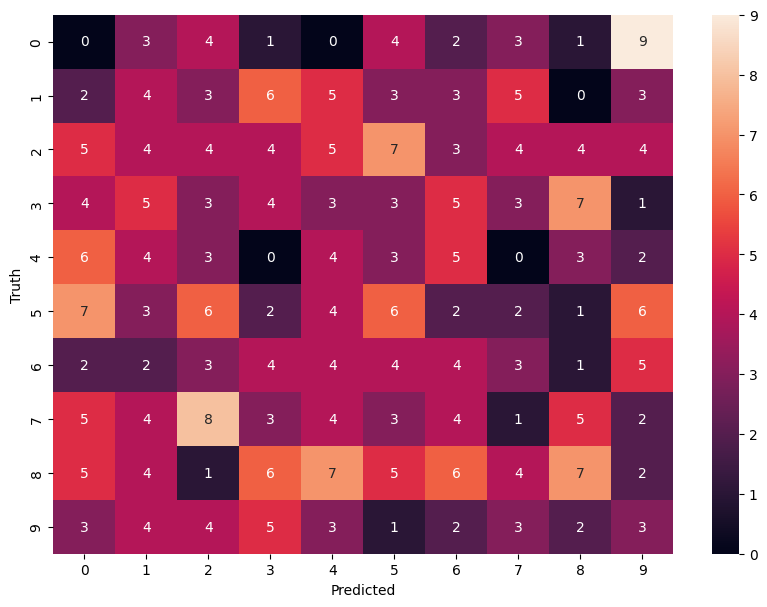

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')